In [2]:
import numpy as np #библиотека для работы с векторами
import pandas as pd #библиотека для работа с данными\таблицами
import matplotlib.pyplot as plt #библиотека для визуализации данных

In [3]:
from datetime import datetime

In [4]:
money = pd.read_csv("AU.csv", sep=";")

In [11]:
money.head(5)

,data,curs
0,10/01/2018,"44,6558"
1,11/01/2018,"44,5205"
2,12/01/2018,"44,8442"
3,13/01/2018,"44,5740"
4,16/01/2018,"44,7925"


In [12]:
target_columns = ["data", "curs"]

In [13]:
print (target_columns)
print (target_columns[0])

['data', 'curs']
data


In [14]:
money = money [target_columns]

In [15]:
money.head(5)

,data,curs
0,10/01/2018,"44,6558"
1,11/01/2018,"44,5205"
2,12/01/2018,"44,8442"
3,13/01/2018,"44,5740"
4,16/01/2018,"44,7925"


In [16]:
real_columns = ["date", "value"]

In [17]:
money.columns = real_columns

In [18]:
money.head(5)

,date,value
0,10/01/2018,"44,6558"
1,11/01/2018,"44,5205"
2,12/01/2018,"44,8442"
3,13/01/2018,"44,5740"
4,16/01/2018,"44,7925"


In [19]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
date     359 non-null object
value    359 non-null object
dtypes: object(2)
memory usage: 5.7+ KB


In [20]:
def convert_money(string):
    return float(string.replace(",", "."))

In [21]:
convert_money("123,123")

123.123

In [22]:
def convert_date(string):
    return datetime.strptime(string, "%d/%m/%Y")

In [23]:
convert_date("21/09/2019"), type (convert_date("21/09/2019"))

(datetime.datetime(2019, 9, 21, 0, 0), datetime.datetime)

In [24]:
money["date"] = money["date"].apply(convert_date)
money["value"] = money["value"].apply(convert_money)

In [25]:
money.head(5)

,date,value
0,2018-01-10,44.6558
1,2018-01-11,44.5205
2,2018-01-12,44.8442
3,2018-01-13,44.5740
4,2018-01-16,44.7925


In [26]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
date     359 non-null datetime64[ns]
value    359 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.7 KB


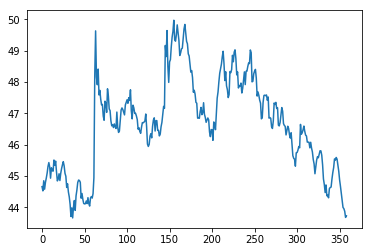

In [27]:
plt.plot (money["value"])

In [34]:
#f(t) = a + b * t -> линейная модель 
#f(t) = a + b * t + c * t ^ 2 -> квадратичная

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
money["id"] = range(len(money))

In [30]:
money.head(5)

,date,value,id
0,2018-01-10,44.6558,0
1,2018-01-11,44.5205,1
2,2018-01-12,44.8442,2
3,2018-01-13,44.5740,3
4,2018-01-16,44.7925,4


In [31]:
len(money)

359

In [32]:
end = 150

In [33]:
X = money [["id"]][:end] # <start>:<end> начиная со <start> до <end> не включая <end>
y = money["value"][:end]

In [41]:
#X = money [["id"]][end:]
#y = money["value"][end:]

In [34]:
reg = LinearRegression().fit(X, y)

In [35]:
y_pred = reg.predict(X)

In [36]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

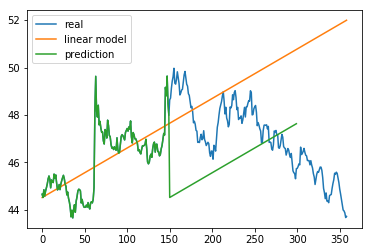

In [39]:
plt.plot(money["value"], label = "real")
plt.plot(reg.predict(money[["id"]]), label = "linear model")
plt.plot(list(y) + list (y_pred), label = "prediction")
plt.legend()

In [47]:
#list (y) + list (y_pred)

[48.638,
 48.7123,
 49.1225,
 49.4298,
 49.6168,
 49.9691,
 49.3451,
 49.3004,
 49.5055,
 49.8209,
 49.5638,
 49.3256,
 48.8436,
 48.9249,
 49.0536,
 49.0789,
 49.4038,
 49.6905,
 49.8358,
 49.5567,
 49.2951,
 49.2181,
 48.8964,
 48.8288,
 48.5754,
 48.3122,
 48.3623,
 48.1376,
 47.67,
 47.7341,
 47.6122,
 47.3499,
 47.3186,
 46.8425,
 46.8504,
 46.838,
 47.052,
 47.186,
 46.9537,
 47.0099,
 47.3352,
 46.9677,
 46.8672,
 46.7101,
 46.7759,
 46.8479,
 46.7872,
 46.4003,
 46.2526,
 46.4791,
 46.4704,
 46.1345,
 46.7206,
 46.6668,
 46.4749,
 46.9607,
 47.4798,
 47.6786,
 48.0025,
 48.2777,
 48.4192,
 48.5699,
 48.8049,
 48.9786,
 48.5896,
 48.043,
 48.3245,
 47.872,
 47.7533,
 47.4993,
 47.595,
 48.3308,
 48.2953,
 48.3935,
 48.8495,
 48.6426,
 48.9501,
 49.0244,
 48.7416,
 48.2247,
 48.3182,
 47.8066,
 47.8816,
 47.8707,
 47.962,
 47.6462,
 47.7938,
 48.05,
 48.3207,
 47.9143,
 48.3404,
 48.3434,
 48.4926,
 48.6063,
 48.5853,
 49.0198,
 48.9351,
 48.0021,
 48.0192,
 48.2603,
 48.3446,
 4